**Ken Hydock**<br>
**5/15/2022**<br>
**Week 2 Ethics, Privacy & Social Justice in Data Science**<br>
**MSDS 640** <br>
**Professor: Aiman Darwiche**<br>


# **Week 2 Assignment**
* Generate 10 EDA Visualizations and 3 Professional Charts

I wasn't entirely sure of the difference between visualizations and charts, so I'm just assuming that *professional* chart means a visualization that is detailed and visually pleasing for inclusion to the paper. Whereas the EDA visualizations are just tools used in devising the information for the former. If I'm wrong, please let me know so I can correct it for the Week 3 deliverable. There is the distinct possibility that I'll end up re-doing all of this for the paper anyways.

I'm running this in Google Colab and the first line here is a fix to get Pandas Profiling to work.

In [258]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


Next this connects to my Google Drive since I've been working on this project remotely and at home. Please note the filepath should you try to re-run this on your drive.

In [259]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

I noted the csv as the latest one available - May 5th, 2022.

In [261]:
df = pd.read_csv('drive/MyDrive/MSDS640/Sentencing_5_5_2022.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10,11,14,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Check our data to maker sure it's what we're expecting.

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266042 entries, 0 to 266041
Data columns (total 41 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   CASE_ID                            266042 non-null  int64  
 1   CASE_PARTICIPANT_ID                266042 non-null  int64  
 2   RECEIVED_DATE                      266042 non-null  object 
 3   OFFENSE_CATEGORY                   266042 non-null  object 
 4   PRIMARY_CHARGE_FLAG                266042 non-null  bool   
 5   CHARGE_ID                          266042 non-null  int64  
 6   CHARGE_VERSION_ID                  266042 non-null  int64  
 7   DISPOSITION_CHARGED_OFFENSE_TITLE  266042 non-null  object 
 8   CHARGE_COUNT                       266042 non-null  int64  
 9   DISPOSITION_DATE                   266042 non-null  object 
 10  DISPOSITION_CHARGED_CHAPTER        266042 non-null  object 
 11  DISPOSITION_CHARGED_ACT            2606

Next, I'm going to filter down to the columns I want to work with.

In [263]:
keep_cols = ['RECEIVED_DATE',	'OFFENSE_CATEGORY',	'DISPOSITION_CHARGED_OFFENSE_TITLE',	
             'CHARGE_COUNT',	'DISPOSITION_DATE',	'DISPOSITION_CHARGED_CLASS',	
             'CHARGE_DISPOSITION',	'SENTENCE_JUDGE',	'SENTENCE_COURT_NAME',	
             'SENTENCE_PHASE',	'SENTENCE_DATE',	'SENTENCE_TYPE',	'COMMITMENT_TYPE',	
             'COMMITMENT_TERM',	'COMMITMENT_UNIT',	'LENGTH_OF_CASE_in_Days',	
             'AGE_AT_INCIDENT',	'RACE',	'GENDER',	'INCIDENT_CITY',	
             'LAW_ENFORCEMENT_AGENCY'																		
]
df = df[keep_cols].copy()
df.head()

RECEIVED_DATE OFFENSE_CATEGORY  \
0  06/09/2013 12:00:00 AM   Aggravated DUI   
1  08/21/2013 12:00:00 AM        Narcotics   
2  08/21/2013 12:00:00 AM        Narcotics   
3  08/21/2013 12:00:00 AM        Narcotics   
4  08/21/2013 12:00:00 AM        Narcotics   

                   DISPOSITION_CHARGED_OFFENSE_TITLE  CHARGE_COUNT  \
0                        DRIVING UNDER THE INFLUENCE             1   
1  [POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...             1   
2  [POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...             1   
3  [POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...             1   
4                             POSSESSION OF CANNABIS             1   

         DISPOSITION_DATE DISPOSITION_CHARGED_CLASS CHARGE_DISPOSITION  \
0  02/10/2014 12:00:00 AM                         A     Plea Of Guilty   
1  11/07/2013 12:00:00 AM                         1     Plea Of Guilty   
2  08/27/2014 12:00:00 AM                         1     Plea Of Guilty   
3  05/28/2014 12:00:00 AM                         1     Plea Of Guilty   
4  11/04/2014 12:00:00 AM                         3     Plea Of Guilty   

          SENTENCE_JUDGE           SENTENCE_COURT_NAME       SENTENCE_PHASE  \
0    Bridget Jane Hughes  District 3 - Rolling Meadows  Original Sentencing   
1  Lawrence Edward Flood          District 1 - Chicago  Original Sentencing   
2        William H Hooks          District 1 - Chicago  Original Sentencing   
3        William H Hooks          District 1 - Chicago  Original Sentencing   
4   James Michael Obbish          District 1 - Chicago  Original Sentencing   

   ...          SENTENCE_TYPE                     COMMITMENT_TYPE  \
0  ...  Conditional Discharge               Conditional Discharge   
1  ...              Probation                           Probation   
2  ...              Probation                           Probation   
3  ...                   Jail  Illinois Department of Corrections   
4  ...                 Prison  Illinois Department of Corrections   

  COMMITMENT_TERM COMMITMENT_UNIT LENGTH_OF_CASE_in_Days  AGE_AT_INCIDENT  \
0             1.0         Year(s)                  145.0             44.0   
1             2.0         Year(s)                   31.0             20.0   
2            18.0          Months                  329.0             26.0   
3             6.0         Year(s)                  232.0             30.0   
4             1.0         Year(s)                  382.0             32.0   

    RACE GENDER INCIDENT_CITY LAW_ENFORCEMENT_AGENCY  
0  White   Male           NaN   ELK GROVE VILLAGE PD  
1  Black   Male       Chicago             CHICAGO PD  
2  Black   Male       Chicago             CHICAGO PD  
3  Black   Male       Chicago             CHICAGO PD  
4  Black   Male       Chicago             CHICAGO PD  

[5 rows x 21 columns]

We've got a few columns that would benefit from converting to datetime format.Due to some clerical errors, it is necessary to include `coerce`. I spent an impressive amount of time trying to fix this and decidely did not find an elegant solution.

In [264]:
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'])
df['DISPOSITION_DATE'] = pd.to_datetime(df['DISPOSITION_DATE'], errors='coerce')
df['SENTENCE_DATE'] = pd.to_datetime(df['SENTENCE_DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266042 entries, 0 to 266041
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   RECEIVED_DATE                      266042 non-null  datetime64[ns]
 1   OFFENSE_CATEGORY                   266042 non-null  object        
 2   DISPOSITION_CHARGED_OFFENSE_TITLE  266042 non-null  object        
 3   CHARGE_COUNT                       266042 non-null  int64         
 4   DISPOSITION_DATE                   266035 non-null  datetime64[ns]
 5   DISPOSITION_CHARGED_CLASS          266023 non-null  object        
 6   CHARGE_DISPOSITION                 266042 non-null  object        
 7   SENTENCE_JUDGE                     265300 non-null  object        
 8   SENTENCE_COURT_NAME                264653 non-null  object        
 9   SENTENCE_PHASE                     266042 non-null  object        
 10  SENTENCE_DATE       

I wanted to include more chronological units for a more comprehensive dataset. So we're going to filter out anything that isn't a good unit of measure for sentencing time.

In [265]:
df['COMMITMENT_UNIT'].unique()

array(['Year(s)', 'Months', 'Days', 'Term', nan, 'Natural Life',
       'Dollars', 'Hours', 'Weeks', 'Kilos', 'Pounds', 'Ounces'],
      dtype=object)

In [266]:
keep_list = ['Year(s)', 'Months', 'Weeks', 'Days']
df = df[df['COMMITMENT_UNIT'].isin(keep_list)]
df['COMMITMENT_UNIT'].unique()

array(['Year(s)', 'Months', 'Days', 'Weeks'], dtype=object)

We can note from earlier that the term is in character format and not numerical. This conversion will make that data more useful.

In [267]:
df['COMMITMENT_TERM'] = pd.to_numeric(df['COMMITMENT_TERM'], errors='coerce')
df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 261067 entries, 0 to 266041
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   RECEIVED_DATE                      261067 non-null  datetime64[ns]
 1   OFFENSE_CATEGORY                   261067 non-null  object        
 2   DISPOSITION_CHARGED_OFFENSE_TITLE  261067 non-null  object        
 3   CHARGE_COUNT                       261067 non-null  int64         
 4   DISPOSITION_DATE                   261060 non-null  datetime64[ns]
 5   DISPOSITION_CHARGED_CLASS          261048 non-null  object        
 6   CHARGE_DISPOSITION                 261067 non-null  object        
 7   SENTENCE_JUDGE                     260337 non-null  object        
 8   SENTENCE_COURT_NAME                259734 non-null  object        
 9   SENTENCE_PHASE                     261067 non-null  object        
 10  SENTENCE_DATE       

Here we'll map out a method to make a new column **COMMITMENT_YEARS** which will calculate the number of years served based on the duration of sentencing.

In [268]:
dict_map = {'Year(s)':1,'Months':12,'Weeks':52, 'Days':365}
op = df['COMMITMENT_UNIT'].map(dict_map)

df['COMMITMENT_UNIT_OP'] = op
df['COMMITMENT_YEARS'] = df['COMMITMENT_TERM'] / df['COMMITMENT_UNIT_OP']
df.drop(['COMMITMENT_UNIT_OP'], axis = 1, inplace = True)

In [269]:
df.head()

RECEIVED_DATE OFFENSE_CATEGORY  \
0    2013-06-09   Aggravated DUI   
1    2013-08-21        Narcotics   
2    2013-08-21        Narcotics   
3    2013-08-21        Narcotics   
4    2013-08-21        Narcotics   

                   DISPOSITION_CHARGED_OFFENSE_TITLE  CHARGE_COUNT  \
0                        DRIVING UNDER THE INFLUENCE             1   
1  [POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...             1   
2  [POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...             1   
3  [POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...             1   
4                             POSSESSION OF CANNABIS             1   

  DISPOSITION_DATE DISPOSITION_CHARGED_CLASS CHARGE_DISPOSITION  \
0       2014-02-10                         A     Plea Of Guilty   
1       2013-11-07                         1     Plea Of Guilty   
2       2014-08-27                         1     Plea Of Guilty   
3       2014-05-28                         1     Plea Of Guilty   
4       2014-11-04                         3     Plea Of Guilty   

          SENTENCE_JUDGE           SENTENCE_COURT_NAME       SENTENCE_PHASE  \
0    Bridget Jane Hughes  District 3 - Rolling Meadows  Original Sentencing   
1  Lawrence Edward Flood          District 1 - Chicago  Original Sentencing   
2        William H Hooks          District 1 - Chicago  Original Sentencing   
3        William H Hooks          District 1 - Chicago  Original Sentencing   
4   James Michael Obbish          District 1 - Chicago  Original Sentencing   

   ...                     COMMITMENT_TYPE COMMITMENT_TERM COMMITMENT_UNIT  \
0  ...               Conditional Discharge             1.0         Year(s)   
1  ...                           Probation             2.0         Year(s)   
2  ...                           Probation            18.0          Months   
3  ...  Illinois Department of Corrections             6.0         Year(s)   
4  ...  Illinois Department of Corrections             1.0         Year(s)   

   LENGTH_OF_CASE_in_Days AGE_AT_INCIDENT   RACE  GENDER INCIDENT_CITY  \
0                   145.0            44.0  White    Male           NaN   
1                    31.0            20.0  Black    Male       Chicago   
2                   329.0            26.0  Black    Male       Chicago   
3                   232.0            30.0  Black    Male       Chicago   
4                   382.0            32.0  Black    Male       Chicago   

  LAW_ENFORCEMENT_AGENCY COMMITMENT_YEARS  
0   ELK GROVE VILLAGE PD              1.0  
1             CHICAGO PD              2.0  
2             CHICAGO PD              1.5  
3             CHICAGO PD              6.0  
4             CHICAGO PD              1.0  

[5 rows x 22 columns]

I could have spent all week cleaning up this data, but looking at the sizes here, I think 230k rows is enough to work with!

In [270]:
df.shape

(261067, 22)

In [271]:
# drop rows with any missing values - we lost several rows but not too many
df.dropna(inplace = True)
df.shape


(229118, 22)

Finally we can run the Pandas Profiling report. I'll export it to HTML for inclusion as well as embedded within the document.

In [272]:
report = ProfileReport(df)
report.to_file('drive/MyDrive/MSDS640/sentencing_eda.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [273]:
report

Reviewing our profile report, we can see a few highlights that may be of interests to our study:

* **OFFENSE_CATEGORY** <br>
We can see that `Narcotics` & `UUW` make up nearly half of all offenses recorded. That is indicitive of a major problem and should be researched for mitigating factors.

* **CHARGE_COUNT** <br>
It's probably a good thing that the mean is only `2`, but I feel we might be able to learn from the proportions of charges as well as the sentence durations to see if there is any biases.

* **DISPOSITION_CHARGED_CLASS** <br>
Similar to the **OFFENSE_CATEGORY**, we can use other categories in conjuction to look for biases, particularly in sentence types.

* **SENTENCE_COURT_NAME** <br>
We see a majority of sentences coming from `District 1 - Chicago`. We should investigate as to why that is.

* **SENTENCE_TYPE** <br>
Well over half of all sentences are to `Illinois Department of Corrections`, aka prison. This is a datapoint that should be investigated to see if there's biases involved or if there are other effective ways of rehabilitation.

* **LENGTH_OF_CASE** <br>
Looks like there's a clerical error here. We'll need to fix this if we intend to use this column.

* **AGE_AT_INCIDENT** <br>
This indicates that younger adults, centered around the age of 25 are most likely to commit a felony. 

* **RACE** <br>
As if this wasn't going to be a problematic enough datapoint, we have several overlapping classifications muddying the information. We're going to need to condense this as best we can and be very careful about it.

* **GENDER** <br>
There's a clear `Male` majority when it comes to felonies. 

* **INCIDENT_CITY** <br>
Considering the datasource and that Chicago proper makes up a majority of the population and area, this isn't terribly surprising, but it is possible to utilize this data to make an informative map with additional data sources.

* **COMMITMENT_YEARS** <br>
I made this column to be able to use all chronological sentences for a more complete picture. It is somewhat relieving to see that the mean is only `3.5` years.

## **OFFENSE_CATEGORY** (Chart 1)
I think this is an import point for an overall visualization chart. By examining the types of offenses, we can see what larger societal problems may be present.

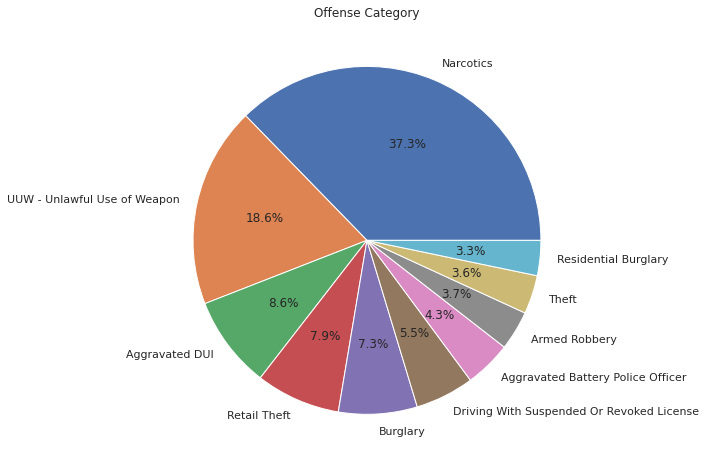

In [274]:
v_counts = df['OFFENSE_CATEGORY'].value_counts().iloc[:10]
fig = plt.figure(figsize=(8,8))
plt.title("Offense Category")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%');

We can very clearly see that over half of all felonies in this dataset are either UWU or Narcotics. I think that paints a clear picture of what sort of preventative and mitigating measures need to be taken.

## **CHARGE_COUNT**
This may be a telling datapoint for bias. Let's look into some of our potentially discriminating factors. We know that our average charge count is 2 from our profile report. Let's look at more of the data.

In [275]:
df['CHARGE_COUNT'].sort_values()

1           1
156064      1
156066      1
156068      1
156069      1
         ... 
261229    194
182486    214
168759    293
168760    294
168761    297
Name: CHARGE_COUNT, Length: 229118, dtype: int64

So that's a massive difference between minimum and maximum and it's not going to plot well. We need to do something with this data. Let's group it by mean to see the average **CHARGE_COUNT** by race.

In [276]:
df_means = df.groupby("RACE")["CHARGE_COUNT"].agg("mean").reset_index()
df_means

RACE  CHARGE_COUNT
0                             ASIAN      1.000000
1                   American Indian      1.616822
2                             Asian      1.891991
3                          Biracial      1.758621
4                             Black      2.049377
5                          HISPANIC      1.698862
6                           Unknown      2.186544
7                             White      1.767990
8        White [Hispanic or Latino]      2.109236
9  White/Black [Hispanic or Latino]      2.246388

Now let's throw that into a visualization...

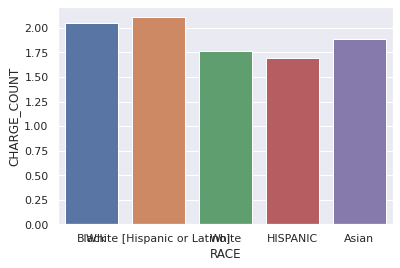

In [277]:
ax = sns.barplot(x="RACE", y="CHARGE_COUNT", data=df_means, order=df['RACE'].value_counts().iloc[:5].index)

It looks like there may be some bias there, but due to the ambiguity of the racial categories, it might end up averaging out over white and hispanic. While we're here, let's look at the comparison between male and female too.

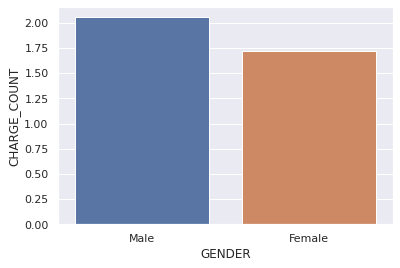

In [278]:
df_means = df.groupby("GENDER")["CHARGE_COUNT"].agg("mean").reset_index()
ax = sns.barplot(x="GENDER", y="CHARGE_COUNT", data=df_means, order=df['GENDER'].value_counts().iloc[:2].index)

I'd say there is a bit of bias here considering we're looking at the average time and there's plenty of datapoints on both genders for an accurate conclusion.

## **DISPOSITION_CHARGED_CLASS**
This breaks up the charges into class, which is an more compact way of codifying the severity of the felonies.

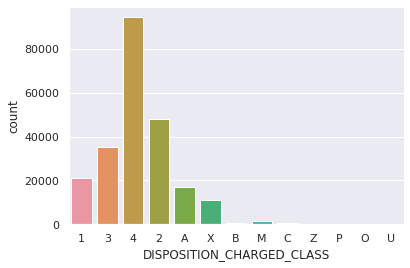

In [279]:
sns.countplot(x='DISPOSITION_CHARGED_CLASS', data=df)

We can see that Class 4 felonies make up a majority of the felonies. What are class 4 felonies?

In [280]:
class4_df = df[df['DISPOSITION_CHARGED_CLASS'] == '4']

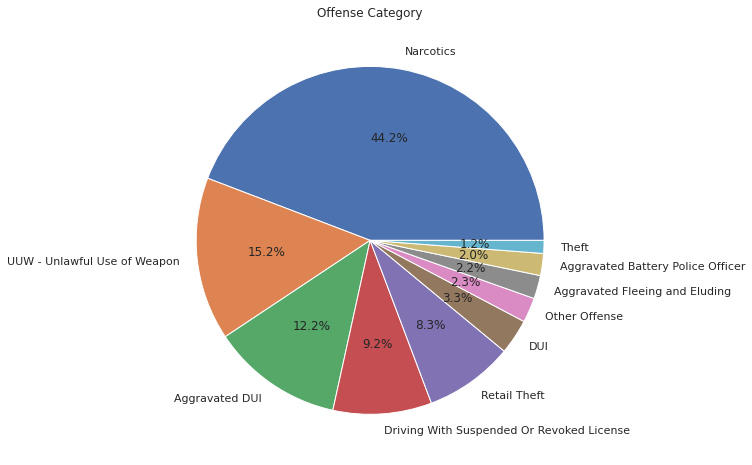

In [281]:
v_counts = class4_df['OFFENSE_CATEGORY'].value_counts().iloc[:10]
fig = plt.figure(figsize=(8,8))
plt.title("Offense Category")
plt.pie(v_counts, labels=v_counts.index, autopct='%1.1f%%');

This makes sense, as it is relatively close to our overall **OFFENSE_CATEGORY** chart, but we can see that some of the less serious crimes are not accounted for here. 

## **RACE** (Chart 2)
Let's work on this first as it is going to be one of the most telling datapoints.

In [282]:
df['RACE'].value_counts()

Black                               154830
White [Hispanic or Latino]           36966
White                                30822
HISPANIC                              3427
Asian                                 1361
White/Black [Hispanic or Latino]      1246
Unknown                                327
American Indian                        107
Biracial                                29
ASIAN                                    3
Name: RACE, dtype: int64

Honestly, fixing the case issue is the only thing I feel comfortable doing here. Just merely having overlapping categories is problematic. Is `White [Hispanic or Latino]` considered `White` or `Hispanic`? Let's not even mention the trifecta of `White/Black [Hispanic or Latino]` category.  

In [283]:
df['RACE'] = df['RACE'].str.lower()

For our first visualization, let's look at the distribution of felonies by race. We know from the information above that a majority of the data is in the top 3 categories, so let's just plot those.

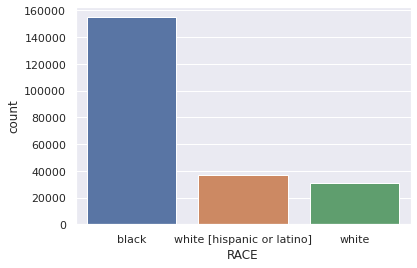

In [284]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="RACE", data=df, order=df['RACE'].value_counts().iloc[:3].index)

Okay - considering the numbers, that scale looks about right. I think we'd need demographic information for the area to really put this into perspective. However, we can add a hue to the plot to get some factual information. Let's look at the `OFFENSE_CATEGORY` by `RACE`.

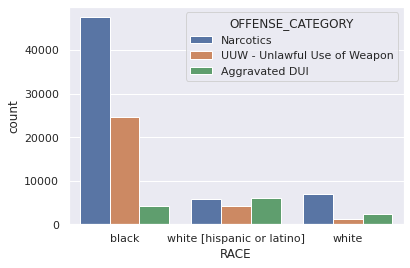

In [285]:
ax = sns.countplot(x="RACE", hue='OFFENSE_CATEGORY', data=df, order=df['RACE'].value_counts().iloc[:3].index, hue_order=df['OFFENSE_CATEGORY'].value_counts().iloc[:3].index)

From our profile report, we know that the top 3 `OFFENSE_CATEGORY` made up a large majority of our data. This does highlight some interesting points as to how different races may commit offenses in different proportions. We can see that despite having a much higher number of felonies, `black` has fewer `Aggravated DUI` than the 2nd category overall and the 3rd by proportion.

What about sentencing? I wonder if there's a trend in how people are sentenced by race. 

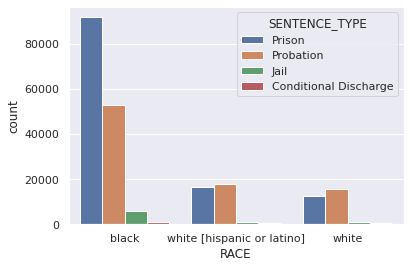

In [286]:
ax = sns.countplot(x="RACE", hue='SENTENCE_TYPE', data=df, order=df['RACE'].value_counts().iloc[:3].index, hue_order=df['SENTENCE_TYPE'].value_counts().iloc[:4].index)

Here we can see a clear bias towards `black` and `prison` compared to anyone else. The other two majorities are near 50/50, with `white` seeming to get a proportionally lower sentencing rate to `prison`.

To wrap up the portion on **RACE**, let's take a look at **DISPOSITION_CHARGED_CLASS** and **Professional Chart #2**

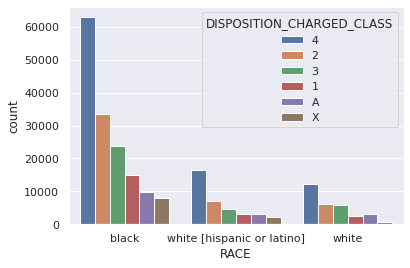

In [287]:
ax = sns.countplot(x="RACE", hue='DISPOSITION_CHARGED_CLASS', data=df, order=df['RACE'].value_counts().iloc[:3].index, hue_order=df['DISPOSITION_CHARGED_CLASS'].value_counts().iloc[:6].index)

I think this plot is quite interesting as well. It looks like the charges classes are mostly proportional, with the exception of `white` receiving a lighter on average class. It seems they receive more `Class A Misdemeanors` than `Class 1 Felonies`. This could be interesting to see if lesser classes are assigned for the same crimes over different races.

## **Time**
Let's look at felony trends over the years.

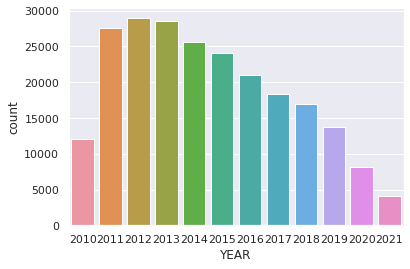

In [288]:
df['YEAR'] = df['RECEIVED_DATE'].dt.year

sns.countplot(x='YEAR', data=df, order=df['YEAR'].value_counts().iloc[:12].index.sort_values())

I'd say that's interesting of the dataset, but not of the information. This graph makes me want to dig deeper into a case is put into the dataset. I would risk a guess it takes times to enter these cases to the system and that they're working a sort of priority system to anonymize the data for inclusion. I highly doubt that the number of annual felonies has more than halved in 8 years.

## **COMMITMENT_YEARS** (Chart 3)
With this column, we can examine all chronological sentences for bias. A second "professional" chart I'm going to go with is sentence time by crime and race to see if there's any bias.

First up, Let's trim the data down to get rid of insane outliers like the 999 year life sentences.

In [289]:
df.drop(df[(df['COMMITMENT_YEARS'] > 100)].index, inplace = True)

Now that we have reasonabe sentences (like life being 100 years), we can normalize it to chart better.

In [290]:
def absolute_maximum_scale(series):
    return series / series.abs().max()

df['COMMITMENT_YEARS_MAX_SCALE'] = absolute_maximum_scale(df['COMMITMENT_YEARS'])

Using a barplot we can compare the most prolific crimes with the most statistically significant races.

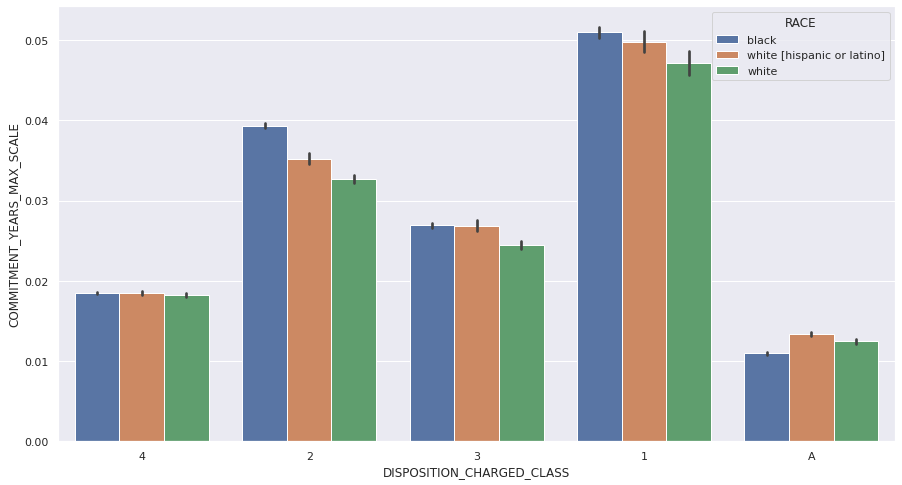

In [291]:
plt.figure(figsize = (15,8))
ax = sns.barplot(x="DISPOSITION_CHARGED_CLASS", y="COMMITMENT_YEARS_MAX_SCALE", hue='RACE', data=df, order=df['DISPOSITION_CHARGED_CLASS'].value_counts().iloc[:5].index, hue_order=df['RACE'].value_counts().iloc[:3].index)

I'd say that's pretty interesting data and I'm not sure I would call it a hard bias. We can see that class 4 felonies are almost universally enforced, whereas class 2 felonies are racially biased and lastly we can see class A misdemeanors are racially biased in a different direction.

Overall, I'd say there may be some bias here that could be investigated and may be problematic in both directions where some races are punished more for more serve crimes, but less so in misdemeanors.  

# Conclusion
This exercise seems like a great starting point for developing the content of a report to the SAO. I can see some areas for further inspection for problematic bias and I will continue to do so next week. There are very clear issues with the types of crimes recorded. Such a large majority of narcotic charges indicate a need for some sort of mitigation or intervention.

I will likely continue with the racial bias notes, the overwhelming percentage of narcotics crimes and further break that down by district for my report.